In [1]:
%pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import os
import sys
import boto3

In [3]:
client = boto3.client("bedrock-runtime")

In [4]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


In [5]:
prompt_data = """
You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- The product with the highest revenue
- The date with the highest revenue
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.
Do not use pandas library for the solution.
"""

In [6]:
body = json.dumps({
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": 4096,
    "temperature": 0.1,
    "top_k":250,
    "top_p":0.99,
    "messages": [
        {
            "role": "user",
            "content": [{"type": "text", "text": prompt_data}]
        }
    ],
})

In [8]:
resp = client.invoke_model(
    body=body, 
    modelId="anthropic.claude-3-sonnet-20240229-v1:0", 
    accept='application/json', 
    contentType='application/json'
)

In [9]:
body = json.loads(resp.get('body').read())

In [10]:
from IPython.display import clear_output, display, display_markdown, Markdown

display_markdown(Markdown(print(body["content"][0]["text"], end='')))

import csv
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

def parse_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d').date()

def analyze_sales(file_path):
    revenue_by_date = defaultdict(int)
    revenue_by_product = defaultdict(int)
    total_revenue = 0

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            date = parse_date(row['date'])
            product_id = row['product_id']
            price = float(row['price'])
            units_sold = int(row['units_sold'])

            revenue = price * units_sold
            total_revenue += revenue
            revenue_by_date[date] += revenue
            revenue_by_product[product_id] += revenue

    highest_revenue_date = max(revenue_by_date, key=revenue_by_date.get)
    highest_revenue_product = max(revenue_by_product, key=revenue_by_product.get)

    print(f"Total revenue for the year: ${total_revenue:.2

Total revenue for the year: $35490.00
Product with the highest revenue: P003
Date with the highest revenue: 2023-04-23


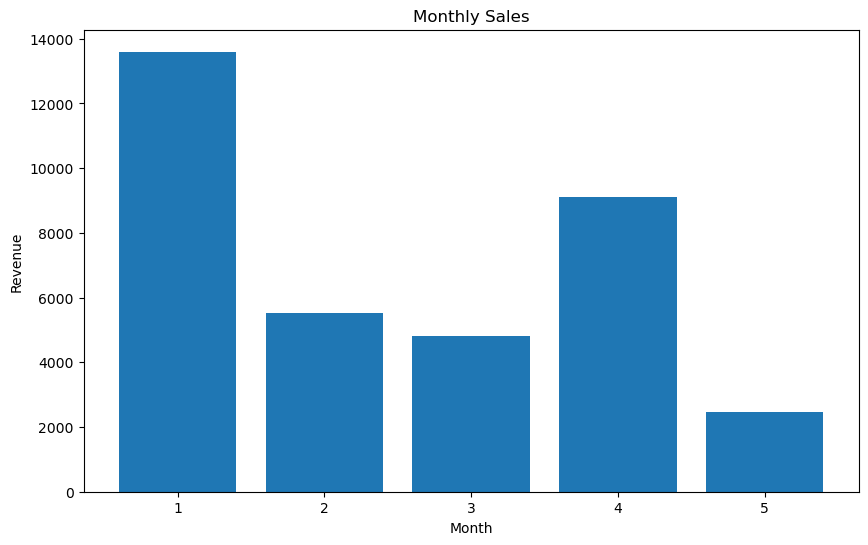

In [11]:
# output code

import csv
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

def parse_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d').date()

def analyze_sales(file_path):
    revenue_by_date = defaultdict(int)
    revenue_by_product = defaultdict(int)
    total_revenue = 0

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            date = parse_date(row['date'])
            product_id = row['product_id']
            price = float(row['price'])
            units_sold = int(row['units_sold'])

            revenue = price * units_sold
            total_revenue += revenue
            revenue_by_date[date] += revenue
            revenue_by_product[product_id] += revenue

    highest_revenue_date = max(revenue_by_date, key=revenue_by_date.get)
    highest_revenue_product = max(revenue_by_product, key=revenue_by_product.get)

    print(f"Total revenue for the year: ${total_revenue:.2f}")
    print(f"Product with the highest revenue: {highest_revenue_product}")
    print(f"Date with the highest revenue: {highest_revenue_date}")

    visualize_monthly_sales(revenue_by_date)

def visualize_monthly_sales(revenue_by_date):
    monthly_revenue = defaultdict(int)
    for date, revenue in revenue_by_date.items():
        monthly_revenue[date.month] += revenue

    months = sorted(monthly_revenue.keys())
    revenues = [monthly_revenue[month] for month in months]

    plt.figure(figsize=(10, 6))
    plt.bar(months, revenues)
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Monthly Sales')
    plt.xticks(months)
    plt.show()

if __name__ == '__main__':
    analyze_sales('sales.csv')